<a href="https://colab.research.google.com/github/abyanjan/US-Airline-Tweet-Analysis/blob/master/US_Airline_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US Airlines Tweet Analysis

**Download Data**  
The data is accessed from kaggle at https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [1]:
!pip install -q kaggle

In [ ]:
# upload the kaggle.json file that has the api key
from google.colab import files
files.upload()

In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download data
! kaggle datasets download -d crowdflower/twitter-airline-sentiment

  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 83.8MB/s]


In [6]:
# unzip the file
!unzip twitter-airline-sentiment.zip

Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
# Read data
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Airlines**  

Visualizing the number of Tweets for each airliines


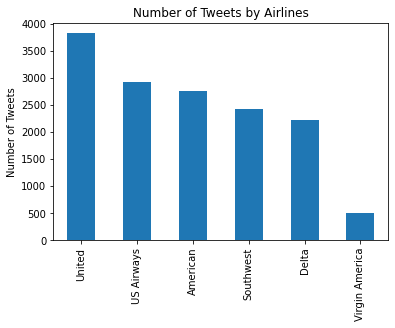

In [ ]:
df.airline.value_counts().plot(kind = 'bar');
plt.title("Number of Tweets by Airlines")
plt.ylabel("Number of Tweets");

We can see United Airlines has the highest number of tweets and there are very less tweets related to Virgin America.

**Tweets By Sentiment Type**  
Visualizing number of tweets by the sentiment type

In [ ]:
tweet_by_sentiment = df.airline_sentiment.value_counts()
tweet_by_sentiment


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# convert to data frame
tweet_by_sentiment = tweet_by_sentiment.to_frame("Counts").rename_axis("Sentiment").reset_index()
tweet_by_sentiment

,Sentiment,Counts
0,negative,9178
1,neutral,3099
2,positive,2363


In [ ]:
# bar plot
px.bar(tweet_by_sentiment, x = "Sentiment", y = "Counts", color = "Sentiment")

We see clearly that there are more Negative tweets overalll. We can break down the counts by the Airlines.

In [ ]:
# sentiment counts by airline
sentiment_by_airline = df.groupby("airline")['airline_sentiment'].value_counts()
sentiment_by_airline = sentiment_by_airline.to_frame(name = "Counts").reset_index()
sentiment_by_airline

,airline,airline_sentiment,Counts
0,American,negative,1960
1,American,neutral,463
2,American,positive,336
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,544
6,Southwest,negative,1186
7,Southwest,neutral,664
8,Southwest,positive,570
9,US Airways,negative,2263


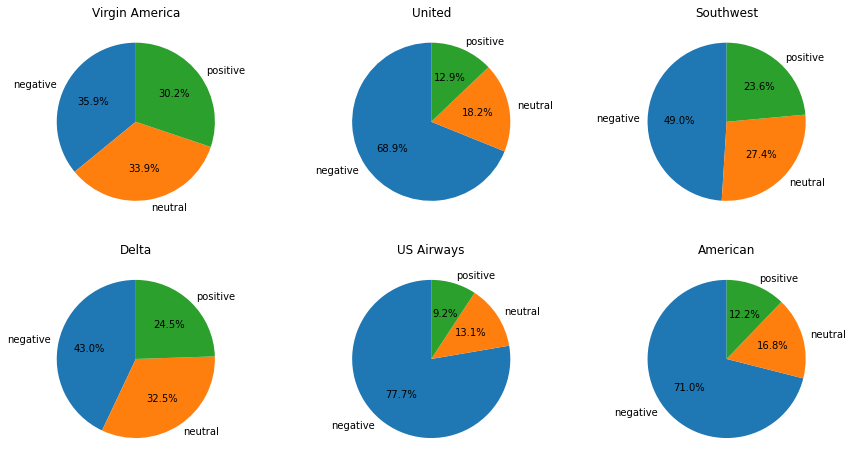

In [ ]:
# plot piechart for sentiment counts by the airlines
airlines = df.airline.unique()

fig, ax = plt.subplots(2,3, figsize = (15,8))
ax = ax.ravel()

for i in range(len(airlines)):
  # get the airlines data
  sentiment = sentiment_by_airline[sentiment_by_airline.airline == airlines[i]]
  ax[i].pie(sentiment['Counts'], labels = sentiment['airline_sentiment'],autopct='%1.1f%%',startangle=90)
  ax[i].set_title(airlines[i])

We see that while all the airlines have high begative reviews, Virgin Amerival has the lowest percentage of negative reviews. United, Us Airways and American have very high number of negative reviews.

**Sentiment Confident Score**  
We can also check how strong are the sentiment of the reviews.

In [ ]:
df[['airline_sentiment','airline_sentiment_confidence']].head()

,airline_sentiment,airline_sentiment_confidence
0,neutral,1.0000
1,positive,0.3486
2,neutral,0.6837
3,negative,1.0000
4,negative,1.0000


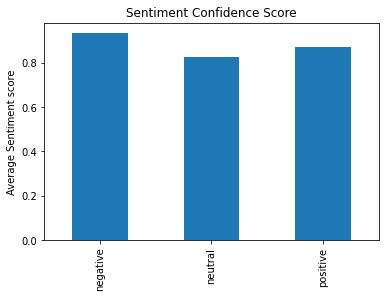

In [ ]:
# taking the mean of the sentiment scores for each sentiment labels
df.groupby('airline_sentiment')['airline_sentiment_confidence'].mean().plot(kind = 'bar');
plt.title("Sentiment Confidence Score");
plt.ylabel("Average Sentiment score");
plt.xlabel("");

We can see that on average the sentiment confidence score are very high for all the sentiment labels.

We can further check if the distribution is same across all the airlines.

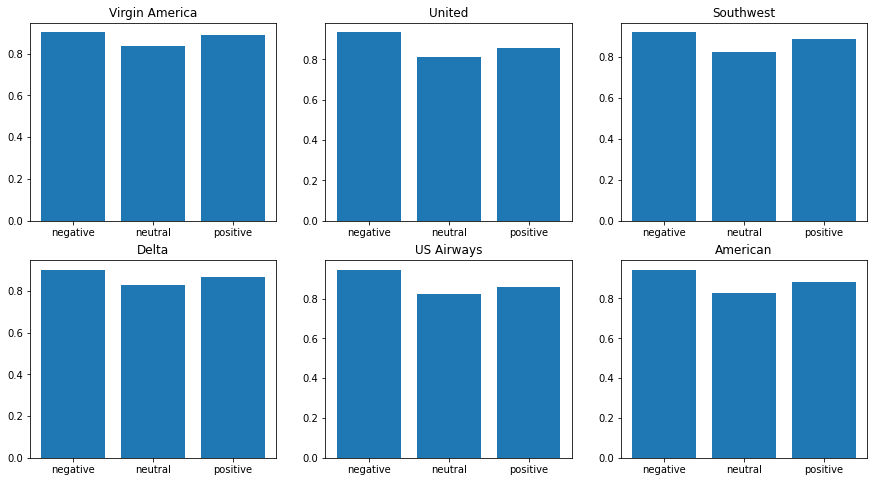

In [ ]:
airlines = df.airline.unique()

fig, ax = plt.subplots(2,3, figsize = (15,8))
ax = ax.ravel()

for i in range(len(airlines)):
  # get the airlines data
  airline_df = df[df.airline == airlines[i]]
  sentiment_score = airline_df.groupby('airline_sentiment')['airline_sentiment_confidence'].mean()
  ax[i].bar(sentiment_score.index, sentiment_score)
  ax[i].set_title(airlines[i])

It looks like the distribution of sentiment score looks very similar for all the airlines.

**Reasons for Negative Reviews**

In [ ]:
df.negativereason.dropna().value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [ ]:
negative_reason_df = df.negativereason.dropna().value_counts().to_frame(name = "Counts").rename_axis("Reason").reset_index()
negative_reason_df.sort_index(axis = 0, level="Counts", ascending=False, inplace=True, )
px.bar(negative_reason_df, x = "Counts", y = "Reason", orientation='h',)


Customer Service seems to be the main reason for the negative sentiments.

We can look at some of the tweets that have high negative sentiments for each of the Airlines.

In [ ]:
negative_tweets = df[df['airline_sentiment'] == 'negative'].sort_values('airline_sentiment_confidence', ascending = False)

airlines = df.airline.unique()
for i in range(len(airlines)):
  tweets_df = negative_tweets[negative_tweets['airline']==airlines[i]]
  print(f"========{airlines[i]}=============")
  for _ , row in tweets_df.head(5).iterrows():
    print(row['text'])
    print('Sentiment Confidence:', row['airline_sentiment_confidence'],'\n')
 

========Virgin America=============
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
Sentiment Confidence: 1.0 

@VirginAmerica and it's a really big bad thing about it
Sentiment Confidence: 1.0 

@VirginAmerica luggage was severely dented/missing wheel coming off baggage claim in SAN. Luggage agent Miranda (I think) wasn't any help.
Sentiment Confidence: 1.0 

@virginamerica Looks like a broken link for your assets https://t.co/OArDjjGrrD
Sentiment Confidence: 1.0 

@VirginAmerica lost my luggage 4 days ago on flight VX 112 from LAX to IAD &amp; I'm calling every day, no response.Please give me back my stuff
Sentiment Confidence: 1.0 

========United=============
@united WHAT?! Y'all have zero concept of customer service. Oh...and now my connection is delayed too!
Sentiment Confidence: 1.0 

@united never fails to have delayed flights 😡
Sentiment Confidence: 1.0 

@united @danahajek : United's CEO has decide

We can also look at some of the postive tweets

In [ ]:
positive_tweets = df[df['airline_sentiment'] == 'positive'].sort_values('airline_sentiment_confidence', ascending = False)

airlines = df.airline.unique()
for i in range(len(airlines)):
  tweets_df = positive_tweets[positive_tweets['airline']==airlines[i]]
  print(f"========{airlines[i]}=============")
  for _ , row in tweets_df.head(5).iterrows():
    print(row['text'])
    print('Sentiment Confidence:', row['airline_sentiment_confidence'],'\n')

========Virgin America=============
@VirginAmerica thanks! Y'all have some of the best customer service left in the industry.
Sentiment Confidence: 1.0 

@VirginAmerica really wish you'd fly out of #Fargo @fargoairport those fares are amazings
Sentiment Confidence: 1.0 

@VirginAmerica just got on the 1pm in Newark home to LA. Your folks at EWR are incredible #letsgohome
Sentiment Confidence: 1.0 

@VirginAmerica Flying LAX to SFO and after looking at the awesome movie lineup I actually wish I was on a long haul.
Sentiment Confidence: 1.0 

@VirginAmerica you guys are perfect as always! &lt;3 #WeRVirgin
Sentiment Confidence: 1.0 

========United=============
@united all good! Next flight was a little delayed so it all worked 👍
Sentiment Confidence: 1.0 

@united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks
Sentiment Confidence: 1.0 

@united Thanks to supervisor Miriam who provided me with great

### Word Cloud

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Clean Text**

In [ ]:
import re

In [ ]:
# cleant text function
def clean_text(text):
  # remove uername and hastags
  text = re.sub(r'[@#]\w+', '', text)
  #remove urls
  text = re.sub(r'http\S+', '', text)
  # remove digits
  text = re.sub(r'[0-9]','', text)
  # remove any extra white space
  text = text.strip()

  return text

In [ ]:
# clean the text
df['text'] = df['text'].apply(clean_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=2, max_features=2000)

In [ ]:
vecs = vectorizer.fit_transform(df['text'])

In [ ]:
vecs

<14640x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 93798 stored elements in Compressed Sparse Row format>

In [ ]:
vecs.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# convert the to data frame
count_frame = pd.DataFrame(vecs.todense(), columns = vectorizer.get_feature_names())

In [ ]:
# get word counts for the words
word_counts = count_frame.sum(axis = 0)

In [ ]:
word_counts.sort_values(ascending=False)

flight        3930
thanks        1078
cancelled     1057
just           974
service        965
              ... 
wrote            7
benefits         7
belt             7
belongings       7
named            7
Length: 2000, dtype: int64

In [ ]:
from wordcloud import WordCloud

In [ ]:
cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(word_counts)

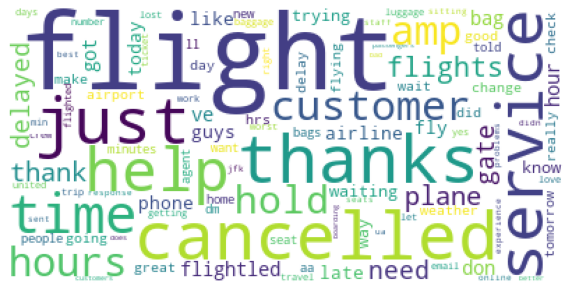

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

**Word Cloud with Bigrams**

In [ ]:
bigram_vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=2, max_features=2000, ngram_range=(2,2))

In [ ]:
bigram_vecs = bigram_vectorizer.fit_transform(df['text'])

In [ ]:
bigram_vecs

<14640x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 19363 stored elements in Compressed Sparse Row format>

In [ ]:
bigram_vecs.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# convert the to data frame
bigram_frame = pd.DataFrame(bigram_vecs.todense(), columns = bigram_vectorizer.get_feature_names())

In [ ]:
# get the tfidf score for the words
bigram_counts = bigram_frame.sum(axis = 0)

In [ ]:
bigram_counts.sort_values(ascending=False)

customer service       562
cancelled flightled    506
late flight            247
flight cancelled       227
cancelled flighted     224
                      ... 
need check               4
need extra               4
need fly                 4
need plane               4
don bag                  4
Length: 2000, dtype: int64

In [ ]:
bigram_cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(bigram_counts)

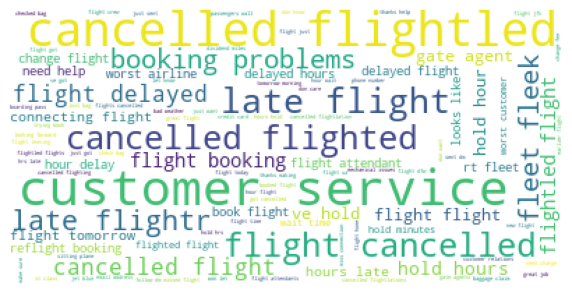

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(bigram_cloud)
plt.axis('off')
plt.show()

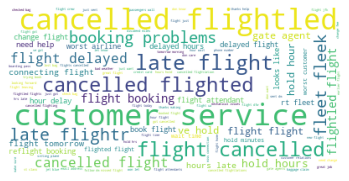

In [ ]:
fig =plt.imshow(bigram_cloud)
plt.axis('off')
plt.show()